In [24]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 
%matplotlib inline

Step 1: Build Corpus of Documents

In [4]:
corpus = ['The sky is blue and beautiful.','Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog',"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
         'I love green eggs, ham, sausages and bacon!','The brown fox is quick and the blue dog is lazy',
         'The sky is very blue and the sky is very beautiful today', 'The dog is lazy but the brown fx is quick!']

In [5]:
labels = ['weather','weather','animals','food','food','animals','weather','animals']

In [6]:
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document':corpus,'Category':labels})
corpus_df = corpus_df[['Document','Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fx is quick!,animals


In [7]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [14]:
def normmalize_document(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A )
    doc = doc.lower()
    doc = doc.strip()
    #tokenize document
    tokens = wpt.tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normmalize_document)

In [15]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fx quick'], dtype='<U51')

Bag of Words Model

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x21 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [19]:
print(cv_matrix)

  (0, 2)	1
  (0, 3)	1
  (0, 18)	1
  (1, 15)	1
  (1, 2)	1
  (1, 3)	1
  (1, 18)	1
  (2, 6)	1
  (2, 14)	1
  (2, 12)	1
  (2, 8)	1
  (2, 5)	1
  (2, 16)	1
  (3, 1)	1
  (3, 19)	1
  (3, 7)	1
  (3, 0)	1
  (3, 11)	1
  (3, 17)	1
  (3, 4)	1
  (3, 13)	1
  (4, 10)	1
  (4, 7)	1
  (4, 0)	1
  (4, 11)	1
  (4, 17)	1
  (4, 15)	1
  (5, 6)	1
  (5, 14)	1
  (5, 8)	1
  (5, 5)	1
  (5, 16)	1
  (5, 3)	1
  (6, 20)	1
  (6, 2)	1
  (6, 3)	1
  (6, 18)	2
  (7, 9)	1
  (7, 6)	1
  (7, 14)	1
  (7, 5)	1
  (7, 16)	1


In [21]:
#view dense representation
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

In [25]:
#get all unique words in the corpus
vocab = cv.get_feature_names()
#show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,fx,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


Bag of N-Grams Model

In [27]:
bv = CountVectorizer(ngram_range = (2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix,columns = vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,brown fx,dog lazy,eggs ham,eggs toast,fox jumps,fox quick,fx quick,green eggs,ham bacon,ham sausages,jumps lazy,kings breakfast,lazy brown,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


TF-IDF Model

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tt = TfidfTransformer(norm='l2',use_idf = True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix,2), columns = vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,fx,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.37,0.37,0.00,0.43,0.00,0.00,0.00,0.51,0.00,0.37,0.00,0.37,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.35,0.00,0.40,0.40,0.00,0.47,0.00,0.00,0.00,0.00,0.00,0.40,0.00,0.40,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.41,0.41,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.41,0.00,0.41,0.00,0.00,0.00,0.0


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tt_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.186878,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.153352,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.802385,0.000000,0.610765
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.186878,0.153352,0.802385,0.000000,0.000000,1.000000,0.112201,0.665444
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.112201,1.000000,0.000000
7,0.000000,0.000000,0.610765,0.000000,0.000000,0.665444,0.000000,1.000000


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z,columns=['Document\Cluster 1', 'Document\Cluster 2', 'Distance','Cluster Size'],dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,0,6,0.308001,2
1,2,5,0.390029,2
2,1,8,0.489844,3
3,7,9,0.620378,3
4,3,4,0.732945,2
5,10,12,2.69504,5
6,11,13,3.1465,8


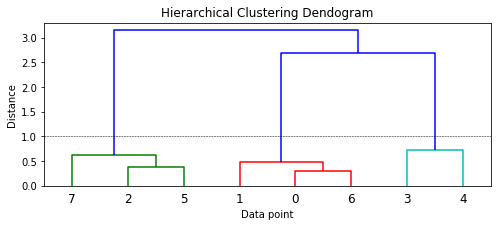

In [37]:
plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0,c='k',ls='--',lw=0.5)

In [39]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z,max_dist,criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_labels],axis = 1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fx is quick!,animals,1


In [ ]:
Thank you!!!